In [538]:
import pandas as pd
import matplotlib as plt
import numpy as np
import json
import requests

In [539]:
%matplotlib inline

In [540]:
url = 'https://pomber.github.io/covid19/timeseries.json'
filedata = requests.get(url)
data = json.loads(filedata.content)
#data.keys()

In [541]:
df = pd.DataFrame()
df['date'] = [m['date'] for m in data['Germany']]
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

df['de'] = [m['confirmed'] for m in data['Germany']]
df['de/dt'] = np.gradient(df.get('de','confirmed'))
df['de/dt2'] = np.gradient(df.get('de/dt','confirmed'))
#df['fr'] = [m['confirmed'] for m in data['France']]
#df['fr/dt'] = np.gradient(df.get('fr','confirmed'))
#df['fr/dt2'] = np.gradient(df.get('fr/dt','confirmed'))
df['it'] = [m['confirmed'] for m in data['Italy']]
df['it/dt'] = np.gradient(df.get('it','confirmed'))
df['it/dt2'] = np.gradient(df.get('it/dt','confirmed'))
#df['ph'] = [m['confirmed'] for m in data['Philippines']]
#df['ph/dt'] = np.gradient(df.get('ph','confirmed'))
#df['ph/dt2'] = np.gradient(df.get('ph/dt','confirmed'))
df['us'] = [m['confirmed'] for m in data['US']]
df['us/dt'] = np.gradient(df.get('us','confirmed'))
df['us/dt2'] = np.gradient(df.get('us/dt','confirmed'))

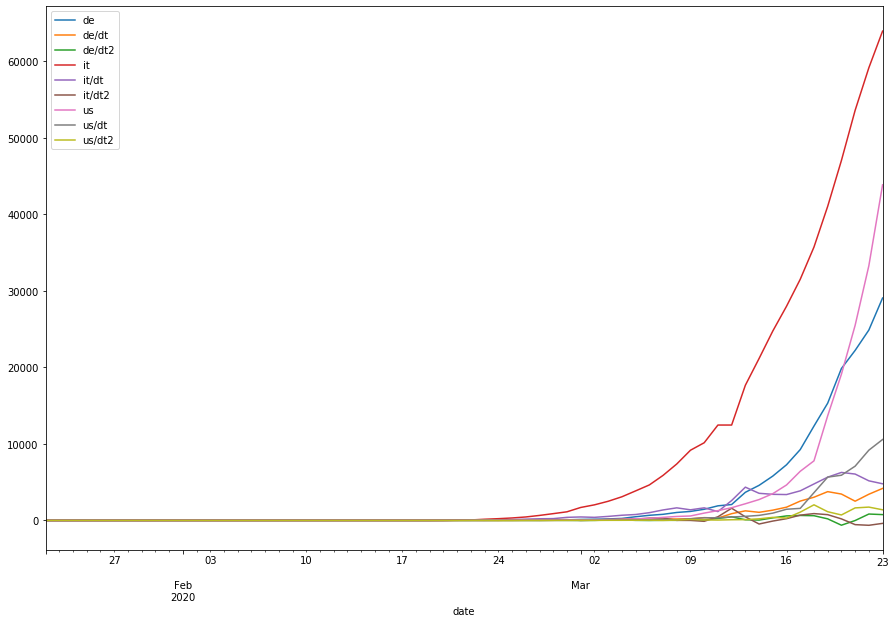

In [542]:
df.plot(figsize=(15,10))

In [543]:
df['de/dt2']

date
2020-01-22      0.00
2020-01-23      0.00
2020-01-24      0.00
2020-01-25      0.25
2020-01-26      1.00
2020-01-27      0.50
2020-01-28     -1.00
2020-01-29     -0.50
2020-01-30      1.00
2020-01-31      1.00
2020-02-01      0.00
2020-02-02     -0.75
2020-02-03     -1.00
2020-02-04     -0.50
2020-02-05      0.25
2020-02-06      0.25
2020-02-07      0.00
2020-02-08      0.00
2020-02-09      0.25
2020-02-10      0.25
2020-02-11     -0.50
2020-02-12     -0.50
2020-02-13      0.00
2020-02-14      0.00
2020-02-15      0.00
2020-02-16      0.00
2020-02-17      0.00
2020-02-18      0.00
2020-02-19      0.00
2020-02-20      0.00
               ...  
2020-02-23      0.25
2020-02-24      2.75
2020-02-25      7.00
2020-02-26      2.50
2020-02-27      1.00
2020-02-28     15.25
2020-02-29     11.75
2020-03-01     -4.00
2020-03-02      5.75
2020-03-03     55.00
2020-03-04     76.25
2020-03-05      7.75
2020-03-06     -9.50
2020-03-07     15.00
2020-03-08     11.75
2020-03-09     88.75
2020-03-

In [544]:
intensive_care_capacity = 30000
intensive_care_factor = 1/100
infection_duration_days = 21

population0 = 83019213
infected0 = 28784
immune0 = 422

healthy0 = population0 - infected0 - immune0

infection_factors = [x/10 for x in range(100,250)]
infection_duration = 14

healthy = list([healthy0])
infected = list([infected0])
new_infected = list([0])
immune = list([immune0])

day = 0

In [545]:
def model_progress(infection_factor, healthy, infected, immune):
    infected_n = infected[-1] * infection_factor * (healthy[-1]/population0)
    new_infected_n = infected_n - infected[-1]
    if len(immune) > infection_duration:
        immune_n = immune[-1] + (infected[-infection_duration] - infected[-infection_duration-1])
    else:
        immune_n = immune[-1]
    healthy_n = healthy[-1] - (infected_n - infected[-1])
    
    return healthy_n, infected_n, new_infected_n, immune_n

In [546]:
for day in range(1,1000):
    healthy_n, infected_n, new_infected_n, immune_n = model_progress(1.1, healthy, infected, immune)
    healthy.append(healthy_n)
    infected.append(infected_n)
    new_infected.append(new_infected_n)
    immune.append(immune_n)
    

In [547]:
df = pd.DataFrame({'healthy' : healthy, 'infected' : infected, 'new' : new_infected, 'immune' : immune})

df.describe()

,healthy,infected,new,immune
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,7.590942e+07,7.109372e+06,7.517995e+03,6.975758e+06
std,1.595254e+06,1.595254e+06,2.989432e+04,1.798237e+06
min,7.547201e+07,2.878400e+04,0.000000e+00,4.220000e+02
25%,7.547201e+07,7.546779e+06,5.587935e-09,7.518417e+06
50%,7.547201e+07,7.546779e+06,6.519258e-09,7.518417e+06
75%,7.547201e+07,7.546779e+06,1.334140e-03,7.518417e+06
max,8.299001e+07,7.546779e+06,1.886241e+05,7.518417e+06


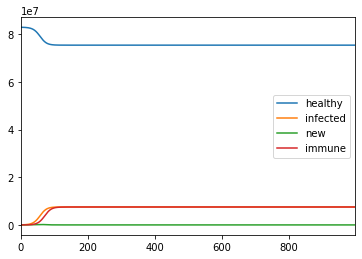

In [548]:
df.plot()